# 1. Business Understanding

## 1.1 Introduction

This project aims to classify sentiments in tweets mentioning Apple and Google products into three categories: positive, neutral, or negative. Sentiment analysis is a key application of natural language processing (NLP) that helps organizations understand public opinion at scale.


## 1.2 Problem Statement

Apple and Google depend heavily on the perception of their customers towards their products. As customers continue to give feedback on platforms such as Twitter(X), it is important to understand the sentiment of their feedback. This has lead to the development of models that can help classify these tweets.

## 1.3 Objectives

### 1.3.1 Main Objective

Build an accurate and efficient natural language processing model to classify tweets mentioning Apple and Google products into three sentiment categories: `positive`, `neutral` and `negative`.

### 1.3.2 Specific objectives

- To explore and analyze the tweet data and provide actionable insights

- To preprocess the data using Natural Language Processing techniques.

- To evaluate classifier performance using appropriate metrics



# 2. Data Understanding

In [48]:
# importing the necessary libraries
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import joblib
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import pickle
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# NLTK packages
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
nltk.download('stopwords')
nltk.download('wordnet')

# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/muchiri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/muchiri/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 2.1 Initial Data Loading and Inspection

In [3]:
df = pd.read_csv('data/judge-1377884607_tweet_product_company.csv', encoding='ISO-8859-1')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [4]:
# renaming the columns
df = df.rename(columns={'tweet_text': 'tweet', 'emotion_in_tweet_is_directed_at': 'directed_at', 'is_there_an_emotion_directed_at_a_brand_or_product':'sentiment'})
df.sample()

,tweet,directed_at,sentiment
6010,"RT @mention Hey if you're at #sxsw, try out th...",NaN,No emotion toward brand or product


In [5]:
# checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet        9092 non-null   object
 1   directed_at  3291 non-null   object
 2   sentiment    9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


- The `tweet` column has only one null row. We will drop this row later on.

- The `directed_at` column has alot of missing values.

In [6]:
# checking the descriptive statistics of the dataset
df.describe()

,tweet,directed_at,sentiment
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


In [7]:
# checking the shae of the dataset
df.shape

(9093, 3)

## 2.2 Data Cleaning

In this section we will:
- Handle missing values
- Check for duplicates


In [8]:
# checking the missing values
df.isnull().sum() 

tweet             1
directed_at    5802
sentiment         0
dtype: int64

In [9]:
# filling in the null values in directed_at with unknown
df['directed_at'].fillna('Unknown', inplace=True)

# dropping the null value in the tweet column
df.dropna(subset=['tweet'], inplace=True, axis=0)

In [10]:
df.isnull().sum()

tweet          0
directed_at    0
sentiment      0
dtype: int64

In [11]:
# checking for duplicate values

df.duplicated().sum()

22

In [12]:
# dropping the duplicates
df.drop_duplicates(inplace=True)

# checking if duplicates were dropped
df.duplicated().sum()

0

In [13]:
df['sentiment'].value_counts()

sentiment
No emotion toward brand or product    5375
Positive emotion                      2970
Negative emotion                       569
I can't tell                           156
Name: count, dtype: int64

In [14]:
# replacing the sentiment values with more descriptive ones
df['sentiment'] = df['sentiment'].replace({
    'No emotion toward brand or product' : 'Neutral emotion',
    "I can't tell" : "Neutral emotion"
})

df['sentiment'].value_counts()

sentiment
Neutral emotion     5531
Positive emotion    2970
Negative emotion     569
Name: count, dtype: int64

## 2.4 Exploratory Data Analysis

In this section we will:

- Check the distribution of the target variable(sentiment) within the dataset

- Check the distribution of tweets across Apple and Google products.

- Investigate how sentiment (positive, negative, neutral) is distributed across Tweets about Apple and Google products.

- Investigate how sentiment is distributed betwwe Apple and Google


### 2.4.1 Distribution of Target Variable

In [15]:
sentiment_perc = df['sentiment'].value_counts(normalize=True) * 100
print(sentiment_perc.round(3))

sentiment
Neutral emotion     60.981
Positive emotion    32.745
Negative emotion     6.273
Name: proportion, dtype: float64


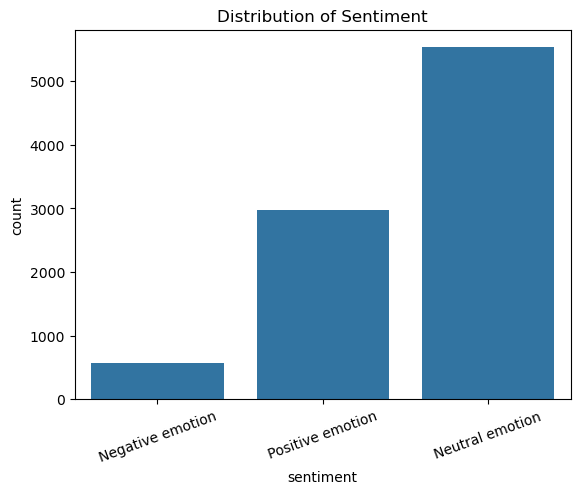

In [16]:
# countplot of the sentiment column
sns.countplot(x='sentiment', data=df)
plt.title("Distribution of Sentiment")
plt.xticks(rotation=20)
plt.show()

From the chart, it is evident that **neutral tweets** are the most frequent, significantly outnumbering the other two classes. **Negative tweets** follow, indicating that a considerable portion of the tweets express dissatisfaction or criticism. On the other hand, **positive tweets** are the least represented in the dataset.

The uneven distribution of sentiment classes means our dataset is **imbalanced**. This poses a significant risk for any machine learning models trained on it, as they are likely to develop a bias toward the majority class (neutral sentiment). To prevent this, preprocessing must include measures like class weighting or resampling to ensure the model learns from all sentiments equally.

### 2.4.2 Distribution of Sentiment across tweets about Apple and Google products

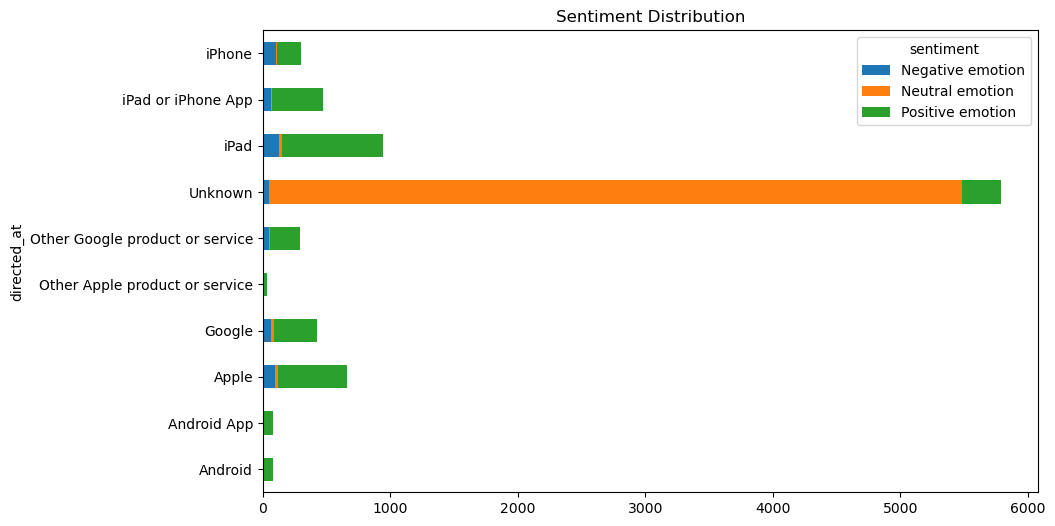

In [17]:
sentiment_counts = df.groupby(['directed_at', 'sentiment']).size().unstack(fill_value=0)
sentiment_counts.plot(kind='barh', stacked=True, figsize=(10,6))
plt.title('Sentiment Distribution')
plt.show()

- Almost every product category, particularly the **high-volume** ones, shows a dominant **Positive segment**. This reinforces the finding that when users talk specifically about these products, the sentiment is generally favorable.

- Categories like **Other Apple product or service, Android App,** and **Android** have the lowest tweet volumes but most are `Positive tweets`

### 2.4.3 Distribution of Sentiment across Google and Apple

In order to better differentiate `sentiment` between the two companies, we feature engineered a new column: `company`. This contains all the products under each respective company.

In [18]:
# classifying the products into their respective companies
company_mapping = {
    'iPhone': 'Apple',
    'iPad or iPhone App': 'Apple',
    'iPad': 'Apple',
    'Apple': 'Apple',
    'Other Apple product or service': 'Apple',
    'Google': 'Google',
    'Android': 'Google',
    'Android App': 'Google',
    'Other Google product or service': 'Google'
}

df['company'] = df['directed_at'].map(company_mapping).fillna('Unknown')

sentiment  Negative emotion  Neutral emotion  Positive emotion
company                                                       
Apple                   387               72              1945
Google                  131               28               719
Unknown                  51             5431               306


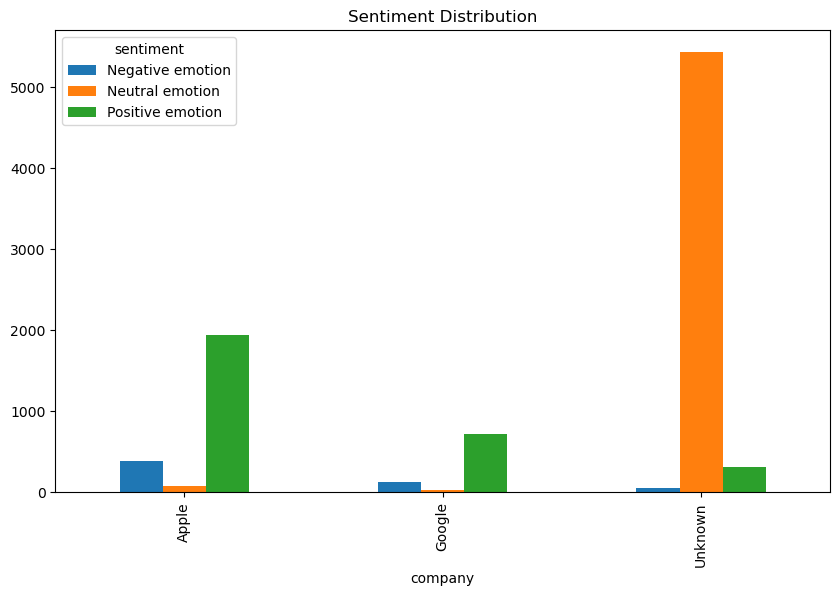

In [19]:
# plotting the distribution of sentiment across tweets about Apple and Google
sentiment_counts_company = df.groupby(['company', 'sentiment']).size().unstack(fill_value=0)
print(sentiment_counts_company)
ax=sentiment_counts_company.plot(kind='bar', stacked=False, figsize=(10,6))
plt.title('Sentiment Distribution')
plt.show()

- Both companies, Apple and Google have a higher count of `Positive emotion` at tweets compared to `Negative emotion.`

- `Apple` has a higher **Positive emotion** than `Google`

- `Apple` also has a higher **Negative emotion** than `Google`

### 2.4.4 Distribution of Negative Sentiment between Google and Apple

sentiment  Negative emotion
company                    
Apple                   387
Google                  131
Unknown                  51


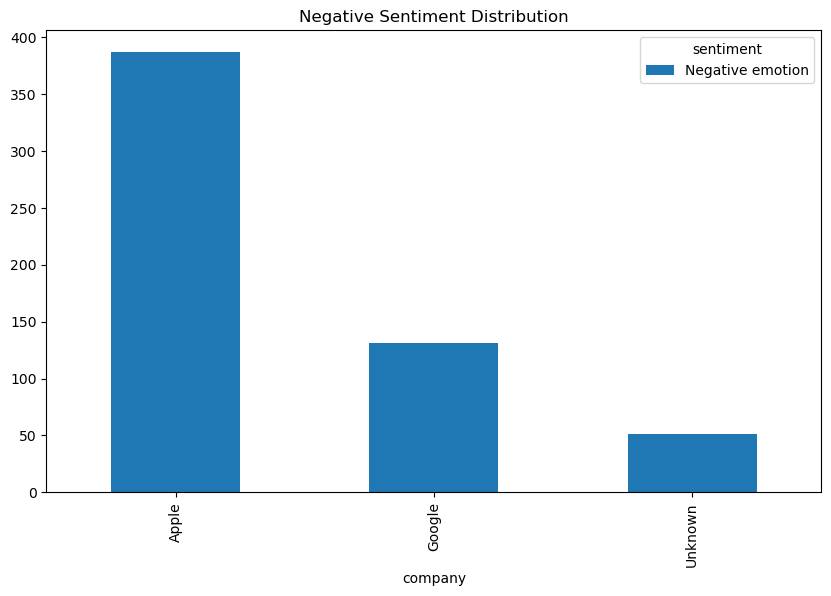

In [20]:
# Distribution of Negative Sentiment between Google and Apple

# Creating a dataframe with only negative sentiment
df_negative = df[df['sentiment'] == 'Negative emotion']

# plotting the distribution of negative sentiment across tweets about Apple and Google
negative_counts_company = df_negative.groupby(['company', 'sentiment']).size().unstack(fill_value=0)
print(negative_counts_company)
negative_counts_company.plot(kind='bar', stacked=False, figsize=(10,6))
plt.title('Negative Sentiment Distribution')
plt.show()



- Apple(387) has more `Negative emotions` compared to Google(131) This is possible because Apple had a higher count of `Negative emotion` than Google. 

### 2.4.5 Distribution of Positive emotion 

sentiment  Positive emotion
company                    
Apple                  1945
Google                  719
Unknown                 306


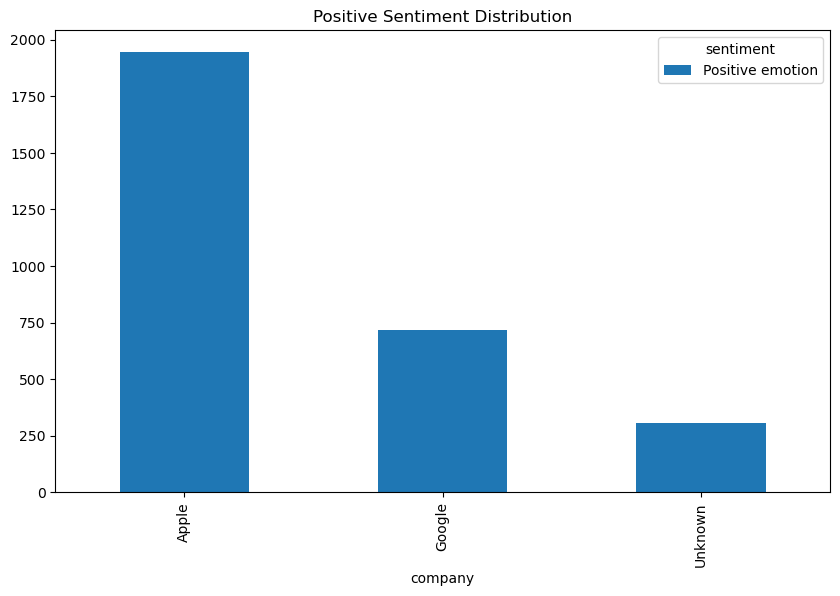

In [21]:
# Distribution of Positive emotion across Google and Apple

# Creating a dataframe with only positive sentiment
df_positive = df[df['sentiment'] == 'Positive emotion']

# Plotting the distribution of positive sentiment across Google and Apple
positive_counts_company = df_positive.groupby(['company', 'sentiment']).size().unstack(fill_value=0)
print(positive_counts_company)
positive_counts_company.plot(kind='bar', stacked=False, figsize=(10,6))
plt.title('Positive Sentiment Distribution')
plt.show()



- `Apple` also has a higher count of **Positive emotion** tweets compared to `Google`


### 2.4.6 Distribution of Tweet Length by Sentiment

([0, 1, 2],
 [Text(0, 0, 'Negative emotion'),
  Text(1, 0, 'Positive emotion'),
  Text(2, 0, 'Neutral emotion')])

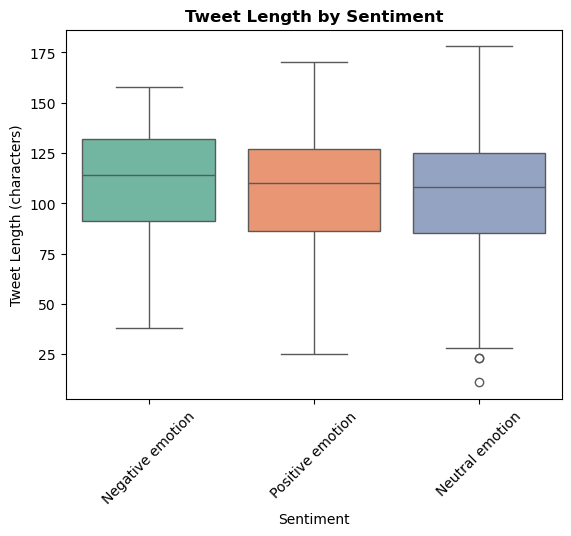

In [22]:
# Feature Engineering - Tweet Length
df['tweet_length'] = df['tweet'].str.len()

# Distribution of Tweet Length by Sentiment
sns.boxplot(data=df, x='sentiment', y='tweet_length', palette='Set2')
plt.title('Tweet Length by Sentiment', fontsize=12, fontweight='bold')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length (characters)')
plt.xticks(rotation=45)

- The vast majority of tweets, regardless of sentiment, utilize the upper limit of the character count (140 characters)

- Since the lengths of positive, negative, and neutral tweets don't differ significantly, we can conclude that the number of characters used isn't a reliable predictor of a tweet's sentiment.

# 3. Data Preprocessing

In [23]:
# Define a mapping for common English contractions
CONTRACTION_MAP = {
    "ain't": "is not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have",
    "cause": "because", "could've": "could have", "couldn't": "could not",
    "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not",
    "hasn't": "has not", "haven't": "have not", "he'd": "he would", "he'll": "he will",
    "he's": "he is", "how'd": "how did", "how'll": "how will", "how's": "how is",
    "I'd": "I would", "I'll": "I will", "I'm": "I am", "I've": "I have", "isn't": "is not",
    "it'd": "it would", "it'll": "it will", "it's": "it is", "let's": "let us",
    "ma'am": "madam", "might've": "might have", "mightn't": "might not",
    "must've": "must have", "mustn't": "must not", "needn't": "need not",
    "o'clock": "of the clock", "shan't": "shall not", "she'd": "she would",
    "she'll": "she will", "she's": "she is", "should've": "should have",
    "shouldn't": "should not", "that's": "that is", "there'd": "there would",
    "there's": "there is", "they'd": "they would", "they'll": "they will",
    "they're": "they are", "they've": "they have", "wasn't": "was not",
    "we'd": "we would", "we'll": "we will", "we're": "we are", "we've": "we have",
    "weren't": "were not", "what'll": "what will", "what's": "what is",
    "what've": "what have", "when's": "when is", "where'd": "where did",
    "where's": "where is", "who'll": "who will", "who's": "who is", "who've": "who have",
    "why's": "why is", "won't": "will not", "would've": "would have",
    "wouldn't": "would not", "y'all": "you all", "you'd": "you would",
    "you'll": "you will", "you're": "you are", "you've": "you have",
    # Specific Twitter/Data-specific replacements
    "@mention": "", # Handle the anonymized mention in the dataset
    "&amp;": "and", # Handle HTML entity
}



In [24]:
from sklearn.base import BaseEstimator, TransformerMixin
class TextPreprocessor(BaseEstimator, TransformerMixin):
    """
    A scikit-learn compatible transformer for cleaning and preprocessing text data.
    """
    def __init__(self, min_word_len=3):
        """
        Initializes the lemmatizer, contraction map, and stopwords.
        NLTK resources (e.g., 'wordnet', 'stopwords') must be downloaded 
        before instantiation (e.g., in a notebook cell).
        """
        self.lemmatizer = WordNetLemmatizer()
        self.contraction_map = CONTRACTION_MAP
        self.stopwords = set(stopwords.words('english'))
        self.min_word_len = min_word_len

    def _expand_contractions(self, text):
        """Expands common contractions in the text."""
        def replace(match):
            return self.contraction_map.get(match.group(0), match.group(0))

        contraction_patterns = re.compile('(%s)' % '|'.join(re.escape(key) for key in self.contraction_map.keys()), 
                                          flags=re.IGNORECASE|re.DOTALL)
        expanded_text = contraction_patterns.sub(replace, text)
        return expanded_text

    def _clean_text(self, text):
        """
        Performs data cleaning steps: URL, mention, hashtag removal, 
        contraction expansion, punctuation removal, repeated character removal, 
        and whitespace normalization.
        """
        if not isinstance(text, str):
            # Convert non-string (like NaN) to empty string
            return ""

        # 1. Removal of URLs
        text = re.sub(r'http\S+|www.\S+', ' ', text)

        # 1. Removal of generic Twitter handles and hashtags
        text = re.sub(r'@[A-Za-z0-9_]+|#[A-Za-z0-9_]+', ' ', text)

        # 2. Expansion of contractions
        text = self._expand_contractions(text)

        # 4. Removal of repeated characters (e.g., 'looove' -> 'love')
        text = re.sub(r'(.)\1{2,}', r'\1', text)

        # 3. Removal of punctuation and special characters (replace with space)
        text = re.sub(r'[^\w\s]', ' ', text)

        # 5. Normalization of whitespace
        text = re.sub(r'\s+', ' ', text).strip()

        return text

    def _preprocess_text(self, text):
        """
        Performs text preprocessing steps: lowercasing, tokenization, 
        stopword removal, short word removal, and lemmatization.
        """
        # 1. Convert to lowercase and tokenize
        tokens = text.lower().split()

        # 3, 4. Stopword and short word removal
        tokens = [
            word 
            for word in tokens 
            if word not in self.stopwords and len(word) >= self.min_word_len
        ]

        # 5. Lemmatization
        tokens = [self.lemmatizer.lemmatize(word) for word in tokens]

        # Re-join for vectorization input
        return " ".join(tokens)

    def process_text(self, text):
        """Applies both cleaning and preprocessing steps."""
        cleaned_text = self._clean_text(text)
        processed_text = self._preprocess_text(cleaned_text)
        return processed_text

    # ------------------------------------------------------------------
    # --- Methods Required for Scikit-learn Pipeline Compatibility ---
    # ------------------------------------------------------------------

    def fit(self, X, y=None):
        """
        Fit method for compatibility. Text preprocessing is stateless 
        (it does not learn from the data), so it just returns itself.
        """
        return self

    def transform(self, X):
        """
        Applies the text processing pipeline to the input data X.
        
        Args:
            X (array-like): Input data, expected to be a list/array of text strings.
            
        Returns:
            list: A list of processed text strings.
        """
        # Check if X is a Pandas Series/DataFrame and extract the values if needed
        if isinstance(X, pd.Series):
            X = X.values
        elif isinstance(X, pd.DataFrame):
            # Assumes the text is in the first column if DataFrame is passed
            X = X.iloc[:, 0].values 
            
        # Apply the processing function to every item in the input array/list X
        # Returns a list of strings, ready for the next pipeline step (e.g., TfidfVectorizer)
        return [self.process_text(text) for text in X]
    
    def fit_transform(self, X, y=None):
        """
        Fit and transform in one step.
        Since fit() doesn't learn anything, just call transform().
        """
        return self.fit(X, y).transform(X)

# Removed the illegal 'vectorize' method.
# In a pipeline, the vectorizer (like TfidfVectorizer) is its own separate step.

In [25]:
processor = TextPreprocessor(min_word_len=3)

In [26]:
# Apply the full processing pipeline to the entire dataset\n",
df['processed_tweet'] = df['tweet'].apply(processor.process_text)

# Display the original and processed tweets
df[['tweet', 'processed_tweet']].head()
    

,tweet,processed_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iphone hr tweeting dead need upgrade plugin st...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,know awesome ipad iphone app likely appreciate...
2,@swonderlin Can not wait for #iPad 2 also. The...,wait also sale
3,@sxsw I hope this year's festival isn't as cra...,hope year festival crashy year iphone app
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff fri marissa mayer google tim reill...


In [27]:
df

,tweet,directed_at,sentiment,company,tweet_length,processed_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,Apple,127,iphone hr tweeting dead need upgrade plugin st...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,Apple,139,know awesome ipad iphone app likely appreciate...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,Apple,79,wait also sale
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,Apple,82,hope year festival crashy year iphone app
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,Google,131,great stuff fri marissa mayer google tim reill...
...,...,...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion,Apple,29,ipad everywhere link
9089,"Wave, buzz... RT @mention We interrupt your re...",Unknown,Neutral emotion,Unknown,125,wave buzz interrupt regularly scheduled geek p...
9090,"Google's Zeiger, a physician never reported po...",Unknown,Neutral emotion,Unknown,145,google zeiger physician never reported potenti...
9091,Some Verizon iPhone customers complained their...,Unknown,Neutral emotion,Unknown,140,verizon iphone customer complained time fell b...


# 4. Modelling

In [28]:
# Label Encoding the target variable
le = LabelEncoder()
df['encoded_sentiment'] = le.fit_transform(df['sentiment'])
df['encoded_sentiment'].value_counts()


encoded_sentiment
1    5531
2    2970
0     569
Name: count, dtype: int64

We have label encoded the trget variables to the following: 

- `Neutral emotion` : 1

- `Positive emotion` : 2

- `Negative emotion` : 3

## 4.1 Multi-Class Classification


In [29]:
# Create a simple preprocessing function
def preprocess_texts(X):
    """Apply text preprocessing to a DataFrame column"""
    if isinstance(X, pd.DataFrame):
        texts = X.iloc[:, 0].values
    elif isinstance(X, pd.Series):
        texts = X.values
    else:
        texts = X
    
    processor = TextPreprocessor(min_word_len=3)
    return [processor.process_text(text) for text in texts]
# Create the transformer
text_transformer = FunctionTransformer(preprocess_texts, validate=False)

In [30]:
df.sample()

,tweet,directed_at,sentiment,company,tweet_length,processed_tweet,encoded_sentiment
3502,At the iPhone dev meetup #SXSW,Unknown,Neutral emotion,Unknown,30,iphone dev meetup,1


In [31]:
# define X and y variables for multi-class classification
X_mul = df[['tweet']]  # define the 'tweet' column as the feature
y_mul = df['encoded_sentiment']  # use the encoded sentiment for multi-class classification

# split the data into training and testing sets
X_train_mul, X_test_mul, y_train_mul, y_test_mul = train_test_split(
    X_mul,
    y_mul,
    test_size=0.2,
    random_state=42,
    stratify=y_mul
)

# display the shapes of the training and testing sets
print(f"\nMulti-class Training set shape: {X_train_mul.shape}")
print(f"Multi-class Test set shape: {X_test_mul.shape}")
print(f"Multi-class Training labels shape: {y_train_mul.shape}")
print(f"Multi-class Test labels shape: {y_test_mul.shape}")


Multi-class Training set shape: (7256, 1)
Multi-class Test set shape: (1814, 1)
Multi-class Training labels shape: (7256,)
Multi-class Test labels shape: (1814,)


In [32]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)

In [33]:
# creating the pipelines

# Pipeline 1: Logistic regression (base model)
logistic_pipe_mul = Pipeline([
    ('preprocessor', text_transformer),
    ('vectorizer', tfidf_vectorizer),
    ('lgb_classifier', LogisticRegression(
        max_iter=1000, 
        random_state=42, 
        class_weight='balanced',
    ))
])
decision_pipe_mul = Pipeline([
    ('preprocessor', text_transformer),
    ('vectorizer', tfidf_vectorizer),
    ('dt_classifier', DecisionTreeClassifier(random_state=42))
])
multinomial_nb_pipe = Pipeline([
    ('preprocessor', text_transformer),
    ('vectorizer', tfidf_vectorizer),
    ('multinomial', MultinomialNB())
])
knn_pipe = Pipeline([
    ('preprocessor', text_transformer),
    ('vectorizer', tfidf_vectorizer),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])
multi_pipelines = {
    'Multi-Logistic Regression (base model)': logistic_pipe_mul,
    'Decision-tree': decision_pipe_mul,
    'MultiNomial NB': multinomial_nb_pipe,
    'KNN': knn_pipe,
}

In [45]:
# train and evaluate all the pipelines
multi_results = {}

# loop through each pipeline
for name, pipe in multi_pipelines.items():
    print(f"\nTraining {name}...")

    # fit the pipeline
    pipe.fit(X_train_mul, y_train_mul)

    # make predictions
    y_pred_mul = pipe.predict(X_test_mul)

    # compute the evaluation metrics
    accuracy = accuracy_score(y_test_mul, y_pred_mul)
    precision = precision_score(y_test_mul, y_pred_mul, average='weighted')
    recall = recall_score(y_test_mul, y_pred_mul, average='weighted')
    f1 = f1_score(y_test_mul, y_pred_mul, average='weighted')

    # store the results
    multi_results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

    # display the results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(" Classification Report:")
    print(classification_report(y_test_mul, y_pred_mul))
# create a DataFrame to display the results
multi_results_df = pd.DataFrame(multi_results).T
multi_results_df = multi_results_df.round(4)
print(multi_results_df)

# determine the best model based on f1 score
best_multi_model = multi_results_df['f1_score'].idxmax()
print(f"\nBest performing model: {best_multi_model}")
print(f"Best f1 score: {multi_results_df.loc[best_multi_model, 'f1_score']:.4f}")


Training Multi-Logistic Regression (base model)...


Accuracy: 0.6378
Precision: 0.6684
Recall: 0.6378
F1 Score: 0.6487
 Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.53      0.37       114
           1       0.77      0.67      0.72      1106
           2       0.56      0.60      0.58       594

    accuracy                           0.64      1814
   macro avg       0.54      0.60      0.55      1814
weighted avg       0.67      0.64      0.65      1814


Training Decision-tree...
Accuracy: 0.6395
Precision: 0.6263
Recall: 0.6395
F1 Score: 0.6302
 Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.26      0.32       114
           1       0.70      0.77      0.73      1106
           2       0.54      0.47      0.50       594

    accuracy                           0.64      1814
   macro avg       0.54      0.50      0.52      1814
weighted avg       0.63      0.64      0.63      1814


Training MultiNomial NB...
A

Across all three models, class 2 (positive sentiment) was consistently under-predicted, as evidenced by low recall and F1-scores. This systemic issue implies a strong bias toward majority classes, resulting in missed detection of positive feedback — a potential strategic blind spot in sentiment-driven decision-making.

The best performing model was the `Multi-Logistic Regression (base model)` with a f1-score of **0.64**

## Model Evaluation

In [ ]:
"""
best_model_multi = 'Multi-Logistic Regression (base model)'
best_pipeline_final = multi_pipelines[best_model_multi]

import os
os.makedirs('Streamlit', exist_ok=True)
filename = 'Streamlit/multi_nlp_model.sav'
pickle.dump(best_pipeline_final, open(filename, 'wb'))
print(f"Model saved successfully: {filename}")
"""


'\nbest_model_multi = \'Multi-Logistic Regression (base model)\'\nbest_pipeline_final = multi_pipelines[best_model_multi]\n\nimport os\nos.makedirs(\'Streamlit\', exist_ok=True)\nfilename = \'Streamlit/multi_nlp_model.sav\'\npickle.dump(best_pipeline_final, open(filename, \'wb\'))\nprint(f"Model saved successfully: {filename}")\n# Load the saved model for implementation\nmulti_loaded_model = pickle.load(open(\'Streamlit/multi_nlp_model.sav\', \'rb\'))\nprint(f"Model loaded successfully\n")\n'

In [ ]:
# Loading the model for implementation
multi_loaded_model = pickle.load(open('Streamlit/multi_nlp_model.sav', 'rb'))

# Testing on the entire test set.
test_predictions_mul = multi_loaded_model.predict(X_test_mul)
test_probabilities_mul = multi_loaded_model.predict_proba(X_test_mul)
# Map encoded labels back to sentiment names
label_mapping = {0: 'Negative', 1: 'Positive', 2: 'Neutral'}
# Show classification report
print(f"\nDetailed Classification Report:")
print(classification_report(y_test_mul, test_predictions_mul, 
                          target_names=['Negative', 'Positive', 'Neutral'],
                          zero_division=0))


Detailed Classification Report:
              precision    recall  f1-score   support

    Negative       0.29      0.53      0.37       114
    Positive       0.77      0.67      0.72      1106
     Neutral       0.56      0.60      0.58       594

    accuracy                           0.64      1814
   macro avg       0.54      0.60      0.55      1814
weighted avg       0.67      0.64      0.65      1814



Confusion Matrix for the best performning model


Confusion Matrix:
[[ 60  27  27]
 [107 743 256]
 [ 43 197 354]]


<Figure size 800x600 with 0 Axes>

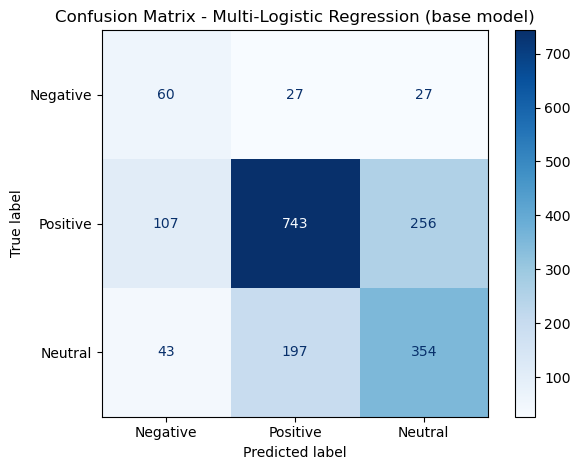

In [37]:
cm = confusion_matrix(y_test_mul, test_predictions_mul)
print("\nConfusion Matrix:")
print(cm)
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive', 'Neutral'])
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_multi}')
plt.tight_layout()
plt.show()


## Hyperparameter tuning of the best performing model

### Training the Model using class weights

In [44]:
from sklearn.utils.class_weight import compute_class_weight
# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_mul),
    y=y_train_mul
)
# Create dictionary mapping
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}
print("Computed Class Weights:")
print(f"  Negative (0): {class_weight_dict[0]:.2f}")
print(f"  Positive (1): {class_weight_dict[1]:.2f}")
print(f"  Neutral (2): {class_weight_dict[2]:.2f}")

# Create model with these weights
optimized_pipeline = Pipeline([
    ('preprocessor', text_transformer),
    ('vectorizer', TfidfVectorizer(ngram_range=(1, 2), max_features=5000)),
    ('classifier', LogisticRegression(
        max_iter=1000,
        random_state=42,
        class_weight=class_weight_dict,  # Use computed weights
        C=1.0,
        solver='saga'
    ))
])
optimized_pipeline.fit(X_train_mul, y_train_mul)
predictions = optimized_pipeline.predict(X_test_mul)
print("\n" + classification_report(y_test_mul, predictions,
                                   target_names=['Negative', 'Positive', 'Neutral']))


Computed Class Weights:
  Negative (0): 5.32
  Positive (1): 0.55
  Neutral (2): 1.02

              precision    recall  f1-score   support

    Negative       0.15      0.73      0.24       114
    Positive       0.81      0.42      0.55      1106
     Neutral       0.50      0.57      0.53       594

    accuracy                           0.49      1814
   macro avg       0.48      0.57      0.44      1814
weighted avg       0.67      0.49      0.52      1814



### Training the Model using an enhanced TF-IDF Vectorizer

In [38]:
# Enhanced TF-IDF configuration
enhanced_vectorizer = TfidfVectorizer(
    ngram_range=(1, 3),  # Include trigrams
    max_features=10000,  # More features
    min_df=2,  # Ignore terms that appear in less than 2 documents
    max_df=0.85,  # Ignore terms that appear in more than 85% of documents
    sublinear_tf=True,  # Use sublinear scaling (log)
    use_idf=True,
    smooth_idf=True,
    norm='l2'  # L2 normalization
)
enhanced_pipeline = Pipeline([
    ('preprocessor', text_transformer),
    ('vectorizer', enhanced_vectorizer),
    ('classifier', LogisticRegression(
        max_iter=2000,
        random_state=42,
        C=10,  # Try stronger regularization
        solver='saga',
        class_weight='balanced'
    ))
])
enhanced_pipeline.fit(X_train_mul, y_train_mul)
predictions = enhanced_pipeline.predict(X_test_mul)
print(classification_report(y_test_mul, predictions,
                           target_names=['Negative', 'Positive', 'Neutral']))

              precision    recall  f1-score   support

    Negative       0.34      0.32      0.33       114
    Positive       0.78      0.60      0.67      1106
     Neutral       0.49      0.71      0.58       594

    accuracy                           0.62      1814
   macro avg       0.53      0.54      0.53      1814
weighted avg       0.66      0.62      0.62      1814



### Fitting the Model using SMOTE

In [43]:
# Create pipeline with SMOTE
smote_pipeline = ImbPipeline([
    ('preprocessor', text_transformer),
    ('vectorizer', TfidfVectorizer(ngram_range=(1, 2), max_features=7000)),
    ('smote', SMOTE(random_state=42, k_neighbors=3)),  # Apply SMOTE
    ('classifier', LogisticRegression(
        max_iter=2000,
        C=10,
        solver='saga',
        random_state=42
    ))
])
print("Training model with SMOTE...")
smote_pipeline.fit(X_train_mul, y_train_mul)
predictions = smote_pipeline.predict(X_test_mul)
print("\n" + classification_report(y_test_mul, predictions,
                                   target_names=['Negative', 'Positive', 'Neutral']))


Training model with SMOTE...

              precision    recall  f1-score   support

    Negative       0.34      0.39      0.37       114
    Positive       0.75      0.73      0.74      1106
     Neutral       0.57      0.59      0.58       594

    accuracy                           0.66      1814
   macro avg       0.55      0.57      0.56      1814
weighted avg       0.67      0.66      0.66      1814



### Comparing all three methods

In [47]:
def compare_models(models_dict, X_train, y_train, X_test, y_test):
    """
    Compare multiple models and return results
    """
    results = {}
    
    for name, model in models_dict.items():
        print(f"\nTraining {name}...")
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, predictions)
        f1 = f1_score(y_test, predictions, average='weighted')
        precision = precision_score(y_test, predictions, average='weighted', zero_division=0)
        recall = recall_score(y_test, predictions, average='weighted', zero_division=0)
        
        results[name] = {
            'accuracy': accuracy,
            'f1_score': f1,
            'precision': precision,
            'recall': recall
        }
    
    # Display comparison
    results_df = pd.DataFrame(results).T.sort_values('f1_score', ascending=False)
    #print("\n" + "="*70)
    print("MODEL COMPARISON")
    #print("="*70)
    print(results_df.round(4))
    
    return results_df

# Define models to compare
models_to_test = {
    'Baseline LR': Pipeline([
        ('preprocessor', text_transformer),
        ('vectorizer', TfidfVectorizer()),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ]),
    'LR + Class Weights': Pipeline([
        ('preprocessor', text_transformer),
        ('vectorizer', TfidfVectorizer(ngram_range=(1, 2), max_features=5000)),
        ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
    ]),
    'LR + Enhanced TF-IDF': enhanced_pipeline,
    'LR + SMOTE': smote_pipeline,
    #'Ensemble': ensemble_pipeline
}

# Run comparison
comparison_results = compare_models(models_to_test, X_train_mul, y_train_mul, X_test_mul, y_test_mul)


Training Baseline LR...

Training LR + Class Weights...

Training LR + Enhanced TF-IDF...

Training LR + SMOTE...
MODEL COMPARISON
                      accuracy  f1_score  precision  recall
Baseline LR             0.7012    0.6717     0.6939  0.7012
LR + SMOTE              0.6604    0.6630     0.6662  0.6604
LR + Class Weights      0.6378    0.6487     0.6684  0.6378
LR + Enhanced TF-IDF    0.6152    0.6217     0.6556  0.6152
